In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np
from matplotlib.ticker import MaxNLocator

In [2]:
df = pd.read_csv('/Users/mihailborisov/Desktop/portfolio/eco_expenses/EDA/eco_full_table.csv', index_col = False, encoding='utf-8')

In [3]:
# general overview of dataset
df.head(10)

,idhod,amount,year,confidentiality,location,non_investment_expense_type,program,sector,type_of_expense
0,704872646,3404636.0,2006,verejny,Česká republika,NaN,Waste management,NaN,Gross investment in tangible non-current assets
1,704872650,1190118.0,2006,verejny,Česká republika,NaN,Limitation of noise and vibration (except work...,NaN,Gross investment in tangible non-current assets
2,704872642,4561770.0,2006,verejny,Česká republika,NaN,Air and climate protection,NaN,Gross investment in tangible non-current assets
3,704872654,166382.0,2006,verejny,Česká republika,NaN,Radiation protection,NaN,Gross investment in tangible non-current assets
4,704872652,1084489.0,2006,verejny,Česká republika,NaN,Landscape and biodiversity protection (species...,NaN,Gross investment in tangible non-current assets
5,704872635,22469983.0,2006,verejny,Česká republika,NaN,NaN,NaN,Gross investment in tangible non-current assets
6,704872644,7348695.0,2006,verejny,Česká republika,NaN,Wastewater management,NaN,Gross investment in tangible non-current assets
7,704872658,507589.0,2006,verejny,Česká republika,NaN,Other environmental protection activities,NaN,Gross investment in tangible non-current assets
8,704872656,4008.0,2006,verejny,Česká republika,NaN,Research and development for environmental pro...,NaN,Gross investment in tangible non-current assets
9,704872648,4202296.0,2006,verejny,Česká republika,NaN,"Protection and rehabilitation of soil, undergr...",NaN,Gross investment in tangible non-current assets


In [4]:
df.tail(10)

,idhod,amount,year,confidentiality,location,non_investment_expense_type,program,sector,type_of_expense
20995,1169719530,0.0,2022,verejny,Moravskoslezský kraj,NaN,Landscape and biodiversity protection (species...,NaN,Revenues from sale of by-products
20996,1169719499,1896925.0,2022,verejny,Moravskoslezský kraj,NaN,Waste management,NaN,Revenues from sale of by-products
20997,1169719510,1781.0,2022,verejny,Moravskoslezský kraj,NaN,"Protection and rehabilitation of soil, undergr...",NaN,Revenues from sale of by-products
20998,1169719469,1998005.0,2022,verejny,Moravskoslezský kraj,NaN,NaN,NaN,Revenues from sale of by-products
20999,1169719479,NaN,2022,duverny,Moravskoslezský kraj,NaN,Air and climate protection,NaN,Revenues from sale of by-products
21000,1169719489,21014.0,2022,verejny,Moravskoslezský kraj,NaN,Wastewater management,NaN,Revenues from sale of by-products
21001,1169719520,0.0,2022,verejny,Moravskoslezský kraj,NaN,Limitation of noise and vibration (except work...,NaN,Revenues from sale of by-products
21002,1169719539,0.0,2022,verejny,Moravskoslezský kraj,NaN,Radiation protection,NaN,Revenues from sale of by-products
21003,1169719549,0.0,2022,verejny,Moravskoslezský kraj,NaN,Research and development for environmental pro...,NaN,Revenues from sale of by-products
21004,1169719559,NaN,2022,duverny,Moravskoslezský kraj,NaN,Other environmental protection activities,NaN,Revenues from sale of by-products


In [5]:
# checking the duplicates
print("Duplicated:", any(df.duplicated()))

Duplicated: False


In [6]:
print(df.describe())
print(df.info())

              idhod        amount          year
count  2.100500e+04  1.773000e+04  21005.000000
mean   8.791595e+08  1.022370e+06   2016.359105
std    2.278336e+08  4.216830e+06      4.792158
min    7.044620e+08  0.000000e+00   2006.000000
25%    7.048777e+08  8.830000e+02   2013.000000
50%    7.931823e+08  4.897100e+04   2017.000000
75%    9.081082e+08  5.635158e+05   2020.000000
max    1.480081e+09  1.006792e+08   2024.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21005 entries, 0 to 21004
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idhod                        21005 non-null  int64  
 1   amount                       17730 non-null  float64
 2   year                         21005 non-null  int64  
 3   confidentiality              21005 non-null  object 
 4   location                     21005 non-null  object 
 5   non_investment_expense_type  4595 non-null   obje

In [7]:
# as it was seen from the previous row, there are many rows with null values in column "hodnota"("amount"), so here is the quick overview of these rows
df[df['amount'].isnull()]

,idhod,amount,year,confidentiality,location,non_investment_expense_type,program,sector,type_of_expense
30,704462051,NaN,2006,duverny,Česká republika,NaN,Limitation of noise and vibration (except work...,NaN,Turnover from selling of services
68,704462058,NaN,2006,duverny,Česká republika,NaN,Limitation of noise and vibration (except work...,NaN,Revenues from sale of by-products
101,704462129,NaN,2007,duverny,Česká republika,NaN,Landscape and biodiversity protection (species...,NaN,Capitalized output (methodology valid until 2015)
176,704462303,NaN,2010,duverny,Česká republika,NaN,Limitation of noise and vibration (except work...,NaN,Turnover from selling of services
177,704462318,NaN,2010,duverny,Česká republika,NaN,Landscape and biodiversity protection (species...,NaN,Capitalized output (methodology valid until 2015)
...,...,...,...,...,...,...,...,...,...
20939,1169719546,NaN,2022,duverny,Moravskoslezský kraj,NaN,Research and development for environmental pro...,Non-financial enterprises,Gross investment in tangible non-current assets
20954,1169719558,NaN,2022,duverny,Moravskoslezský kraj,NaN,Other environmental protection activities,NaN,Turnover from selling of services
20959,1169719480,NaN,2022,duverny,Moravskoslezský kraj,NaN,Air and climate protection,NaN,Capitalized output (methodology valid until 2015)
20999,1169719479,NaN,2022,duverny,Moravskoslezský kraj,NaN,Air and climate protection,NaN,Revenues from sale of by-products


In [8]:
# the output shows that 100% of these transactions are "duverny"("not publicly available"), so it needs further investigation
print('Transactions without values:',len(df[df['amount'].isnull()]))
print('Transactions with non-public specification:',len(df[df['confidentiality'] == 'duverny']))
print('Transactions without values and with non-public specification:',len(df[(df['confidentiality'] != 'duverny') & (df['amount'].isnull())]))

Transactions without values: 3275
Transactions with non-public specification: 3275
Transactions without values and with non-public specification: 0


In [9]:
# the result of the previous test is that all transactions without values are not publicly available
print(f'% of publicly available compared to all transactions: {len(df[df['amount'].isnull()]) / len(df) * 100} %')

% of publicly available compared to all transactions: 15.591525827184006 %


In [10]:
# investigating YoY change of the count of confidential transactions
YoY_count_conf = df.groupby(['year', 'confidentiality']).size().reset_index(name='count')
print(YoY_count_conf)

    year confidentiality  count
0   2006         duverny     24
1   2006         verejny    325
2   2007         duverny     24
3   2007         verejny    325
4   2008         duverny     59
5   2008         verejny    458
6   2009         duverny     56
7   2009         verejny    461
8   2010         duverny    194
9   2010         verejny    880
10  2011         duverny    171
11  2011         verejny    903
12  2012         duverny    209
13  2012         verejny   1053
14  2013         duverny    212
15  2013         verejny   1050
16  2014         duverny    209
17  2014         verejny   1141
18  2015         duverny    223
19  2015         verejny   1127
20  2016         duverny    210
21  2016         verejny   1140
22  2017         duverny    207
23  2017         verejny   1141
24  2018         duverny    196
25  2018         verejny   1154
26  2019         duverny    224
27  2019         verejny   1126
28  2020         duverny    220
29  2020         verejny   1130
30  2021

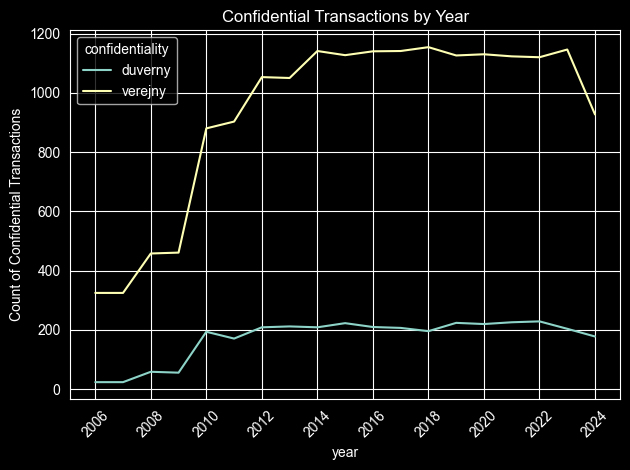

In [11]:
ax = sns.lineplot(data=YoY_count_conf, x='year', y='count', hue='confidentiality')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(rotation=45)
plt.title('Confidential Transactions by Year')
plt.ylabel('Count of Confidential Transactions')
plt.tight_layout()
plt.show()

In [12]:
# investigating YoY change of the share of confidential transactions
summary_YoY = df.groupby(['year', 'confidentiality']).size().unstack()
summary_YoY['total'] = summary_YoY['duverny'] + summary_YoY['verejny']
summary_YoY['share_conf'] = summary_YoY['duverny'] / summary_YoY['total']
summary_YoY.sort_values(by=['year'], ascending=True, inplace=True)
print(summary_YoY)

confidentiality  duverny  verejny  total  share_conf
year                                                
2006                  24      325    349    0.068768
2007                  24      325    349    0.068768
2008                  59      458    517    0.114120
2009                  56      461    517    0.108317
2010                 194      880   1074    0.180633
2011                 171      903   1074    0.159218
2012                 209     1053   1262    0.165610
2013                 212     1050   1262    0.167987
2014                 209     1141   1350    0.154815
2015                 223     1127   1350    0.165185
2016                 210     1140   1350    0.155556
2017                 207     1141   1348    0.153561
2018                 196     1154   1350    0.145185
2019                 224     1126   1350    0.165926
2020                 220     1130   1350    0.162963
2021                 226     1123   1349    0.167532
2022                 229     1120   1349    0.

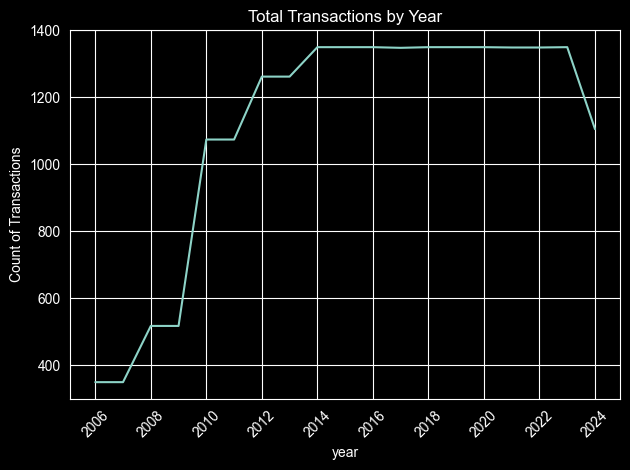

In [13]:
# visualizing the total count of transactions over the years
ax = sns.lineplot(data=summary_YoY, x='year', y='total')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(rotation=45)
plt.title('Total Transactions by Year')
plt.ylabel('Count of Transactions')
plt.tight_layout()
plt.show()

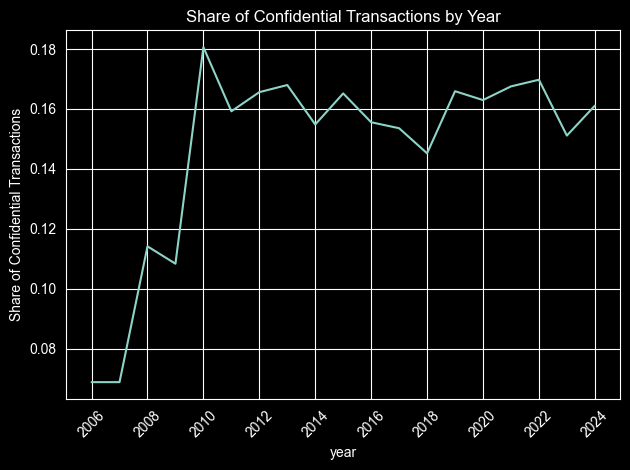

In [14]:
# visualizing the share of confidential transactions over the years
ax = sns.lineplot(data=summary_YoY, x='year', y='share_conf')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(rotation=45)
plt.title('Share of Confidential Transactions by Year')
plt.ylabel('Share of Confidential Transactions')
plt.tight_layout()
plt.show()

In [15]:
# investigating a distribution of confidential expenses
count_by_region = df.groupby(['location', 'confidentiality']).size().reset_index(name='count')
count_by_region['duverny_count'] = count_by_region[count_by_region['confidentiality'] == 'duverny'].groupby('location')['count'].transform('sum')
count_by_region.sort_values(by=['duverny_count'], ascending=True, inplace=True)

# investigation of the share of confidential transactions over total count
summary_region = df.groupby(['location', 'confidentiality']).size().unstack()
summary_region['total'] = summary_region['duverny'] + summary_region['verejny']
summary_region['share_conf'] = summary_region['duverny'] / summary_region['total']
summary_region.sort_values(by=['duverny'], ascending=True, inplace=True)

# repeating the same for the program specification and type of expense
count_by_program = df.groupby(['program', 'confidentiality']).size().reset_index(name='count')
count_by_program['duverny_count'] = count_by_program[count_by_program['confidentiality'] == 'duverny'].groupby('program')['count'].transform('sum')
count_by_program.sort_values(by=['duverny_count'], ascending=True, inplace=True)

summary_program = df.groupby(['program', 'confidentiality']).size().unstack()
summary_program['total'] = summary_program['duverny'] + summary_program['verejny']
summary_program['share_conf'] = summary_program['duverny'] / summary_program['total']
summary_program.sort_values(by=['duverny'], ascending=True, inplace=True)

count_by_type_of_expense = df.groupby(['type_of_expense', 'confidentiality']).size().reset_index(name='count')
count_by_type_of_expense['duverny_count'] = count_by_type_of_expense[count_by_type_of_expense['confidentiality'] == 'duverny'].groupby('type_of_expense')['count'].transform('sum')
count_by_type_of_expense.sort_values(by=['duverny_count'], ascending=True, inplace=True)

summary_type_of_expense = df.groupby(['type_of_expense', 'confidentiality']).size().unstack()
summary_type_of_expense['total'] = summary_type_of_expense['duverny'] + summary_type_of_expense['verejny']
summary_type_of_expense['share_conf'] = summary_type_of_expense['duverny'] / summary_type_of_expense['total']
summary_type_of_expense.sort_values(by=['duverny'], ascending=True, inplace=True)

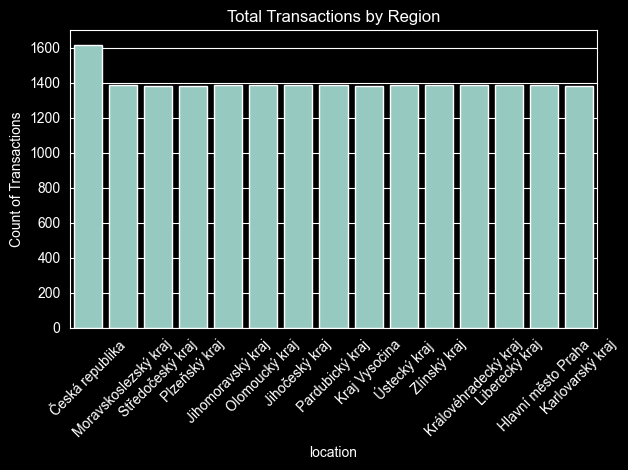

In [16]:
# looking at total count of confidential transactions by region
sns.barplot(data=summary_region, x='location', y='total')

plt.xticks(rotation=45)
plt.title('Total Transactions by Region')
plt.ylabel('Count of Transactions')
plt.tight_layout()
plt.show()

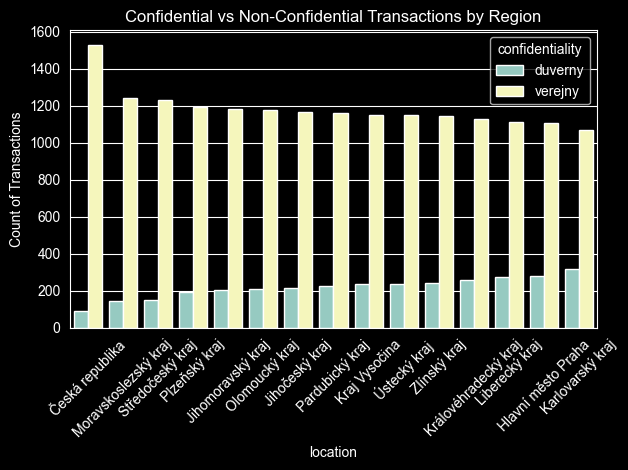

In [17]:
# comparing count of transactions distribution of confidential and public records by region
sns.barplot(data=count_by_region, x='location', y='count', hue='confidentiality')

plt.xticks(rotation=45)
plt.title('Confidential vs Non-Confidential Transactions by Region')
plt.ylabel('Count of Transactions')
plt.tight_layout()
plt.show()

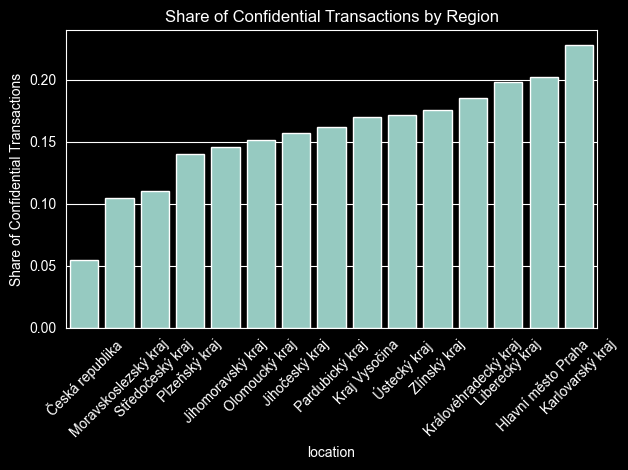

In [18]:
# visualizing the share of the confidential transactions (region)
sns.barplot(data=summary_region, x='location', y='share_conf')

plt.xticks(rotation=45)
plt.title('Share of Confidential Transactions by Region')
plt.ylabel('Share of Confidential Transactions')
plt.tight_layout()
plt.show()

/var/folders/nm/b4832g3j3qz74wnd_4zg0_f00000gn/T/ipykernel_788/1552003412.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


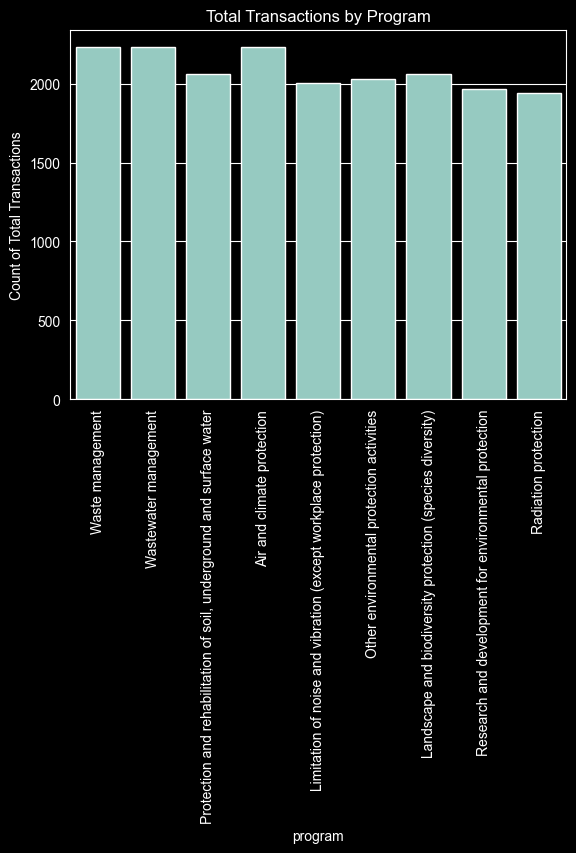

In [43]:
# looking at total count of confidential transactions by program
sns.barplot(data=summary_program, x='program', y='total')

plt.xticks(rotation=90)
plt.title('Total Transactions by Program')
plt.ylabel('Count of Total Transactions')
plt.tight_layout()
plt.show()

/var/folders/nm/b4832g3j3qz74wnd_4zg0_f00000gn/T/ipykernel_788/2281040063.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


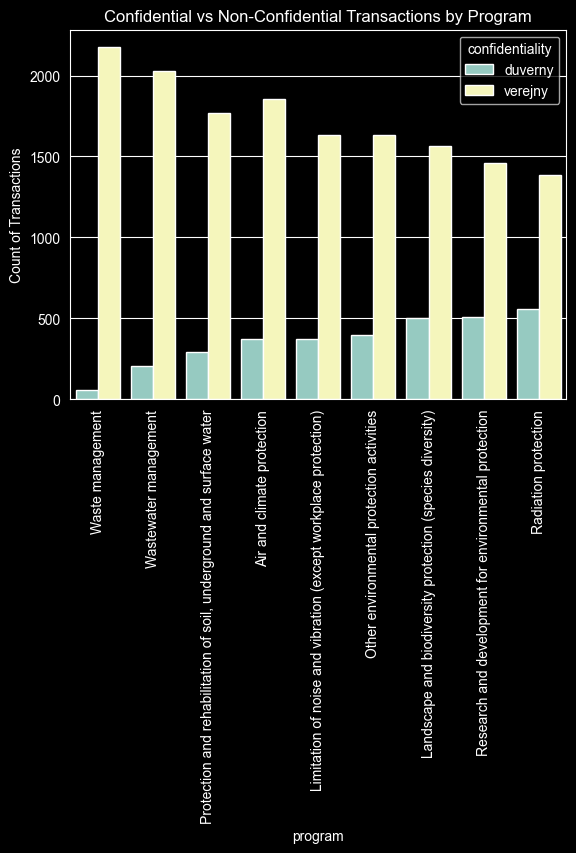

In [20]:
# comparing count of transactions distribution of confidential and public records by program
sns.barplot(data=count_by_program, x='program', y='count', hue='confidentiality')

plt.xticks(rotation=90)
plt.title('Confidential vs Non-Confidential Transactions by Program')
plt.ylabel('Count of Transactions')
plt.tight_layout()
plt.show()

/var/folders/nm/b4832g3j3qz74wnd_4zg0_f00000gn/T/ipykernel_788/3318586954.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


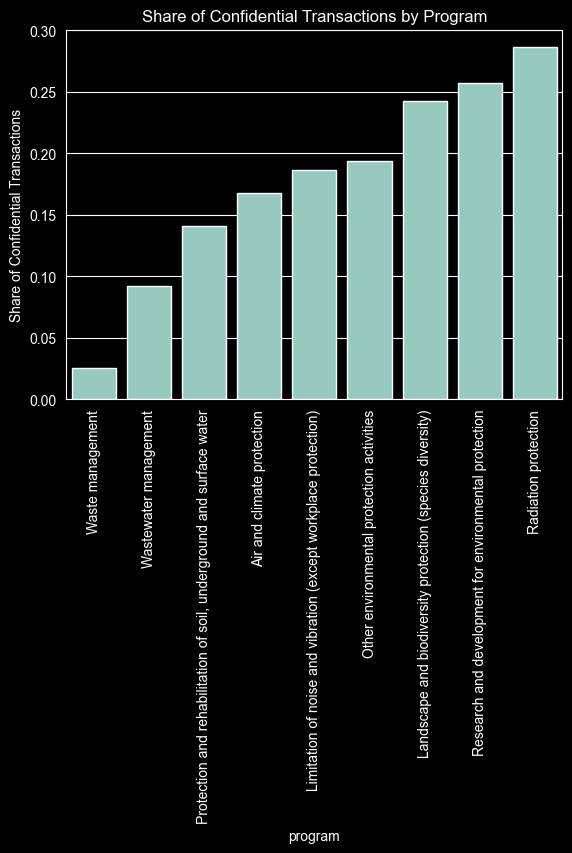

In [21]:
# visualizing the share of the confidential transactions (program)
sns.barplot(data=summary_program, x='program', y='share_conf')

plt.xticks(rotation=90)
plt.title('Share of Confidential Transactions by Program')
plt.ylabel('Share of Confidential Transactions')
plt.tight_layout()
plt.show()

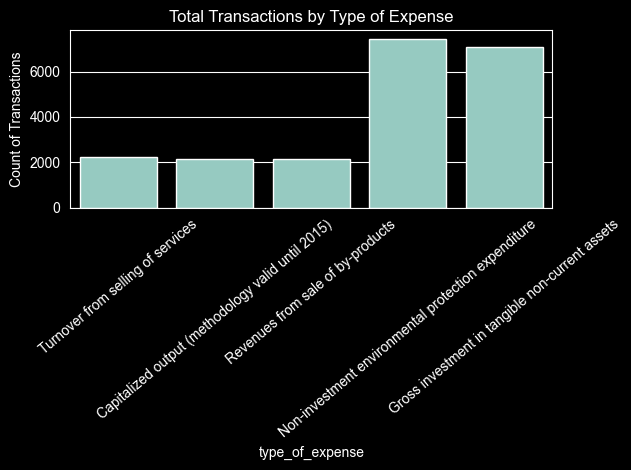

In [22]:
# looking at total count of confidential transactions by type of expense
sns.barplot(data=summary_type_of_expense, x='type_of_expense', y='total')

plt.xticks(rotation=40)
plt.title('Total Transactions by Type of Expense')
plt.ylabel('Count of Transactions')
plt.tight_layout()
plt.show()

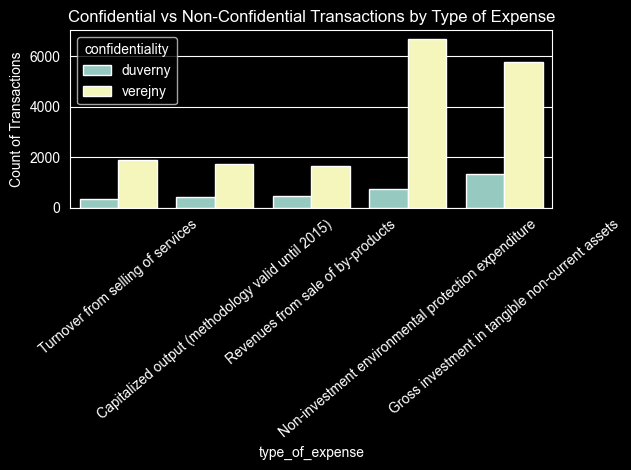

In [23]:
# comparing count of transactions distribution of confidential and public records by type of expense
sns.barplot(data=count_by_type_of_expense, x='type_of_expense', y='count', hue='confidentiality')

plt.xticks(rotation=40)
plt.title('Confidential vs Non-Confidential Transactions by Type of Expense')
plt.ylabel('Count of Transactions')
plt.tight_layout()
plt.show()

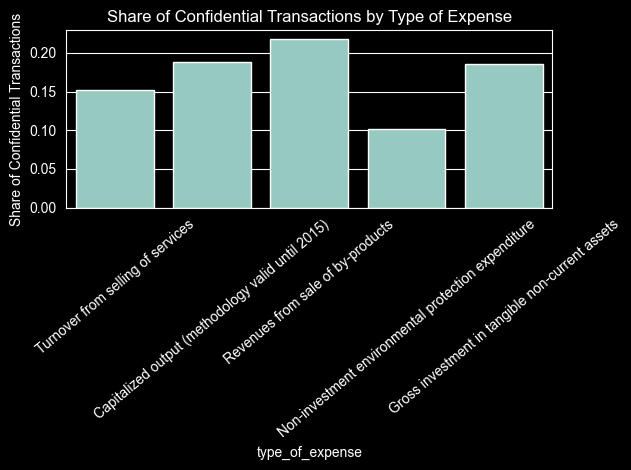

In [24]:
# visualizing the share of the confidential transactions (type of expense)
sns.barplot(data=summary_type_of_expense, x='type_of_expense', y='share_conf')

plt.xticks(rotation=40)
plt.title('Share of Confidential Transactions by Type of Expense')
plt.ylabel('Share of Confidential Transactions')
plt.tight_layout()
plt.show()

In [25]:
# creating heatmap to investigate the percentage of confidential transactions between location and program
pivot_total_count = count_by_region = df.groupby(['location', 'program']).size().reset_index(name='total')
pivot_conf_count = df[df['confidentiality'] == 'duverny'].groupby(['location', 'program']).size().reset_index(name='confidential')

pivot_conf_corr = pd.merge(pivot_conf_count, pivot_total_count, on=['location', 'program'], how='inner')
pivot_conf_corr['share_of_conf'] = pivot_conf_corr['confidential']/pivot_conf_corr['total']

pivot_table_conf_corr = pivot_conf_corr.pivot(index='location', columns='program', values='share_of_conf').fillna(0)
print(pivot_table_conf_corr)

program               Air and climate protection  \
location                                           
Hlavní město Praha                      0.176871   
Jihomoravský kraj                       0.183673   
Jihočeský kraj                          0.136054   
Karlovarský kraj                        0.319728   
Kraj Vysočina                           0.204082   
Královéhradecký kraj                    0.272109   
Liberecký kraj                          0.129252   
Moravskoslezský kraj                    0.102041   
Olomoucký kraj                          0.217687   
Pardubický kraj                         0.217687   
Plzeňský kraj                           0.102041   
Středočeský kraj                        0.047619   
Zlínský kraj                            0.190476   
Ústecký kraj                            0.244898   
Česká republika                         0.000000   

program               Landscape and biodiversity protection (species diversity)  \
location                        

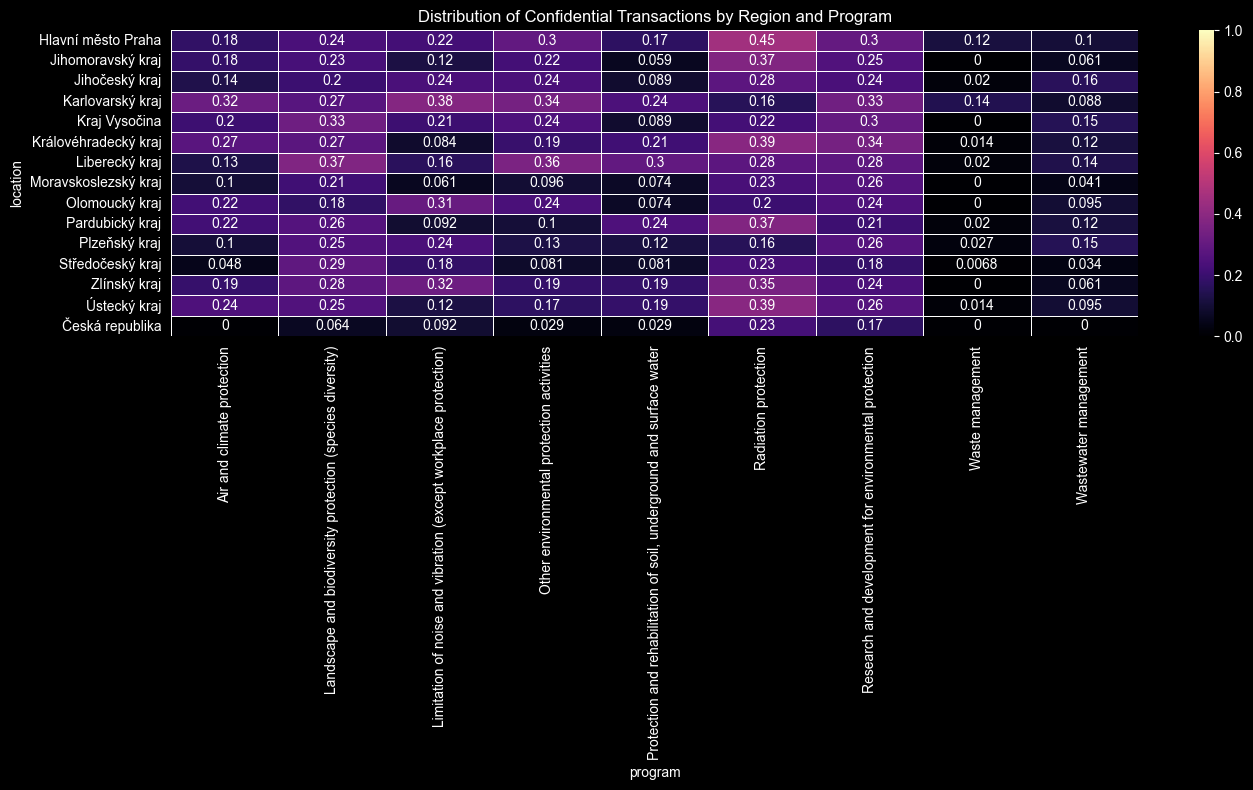

In [26]:
# overview of count of confidential transactions over regions and programs
plt.figure(figsize=(14, 8), facecolor='black')

sns.heatmap(pivot_table_conf_corr, cmap='magma', linewidths=0.5, linecolor='white', annot=True, vmin=0, vmax=1)

plt.title('Distribution of Confidential Transactions by Region and Program')
plt.tight_layout()
plt.show()

In [27]:
# creating heatmap to investigate the correlation between location and program
pivot_corr = df.groupby(['location', 'program'])['amount'].sum().reset_index()
pivot_table_corr = pivot_corr.pivot(index='location', columns='program', values='amount').fillna(0)

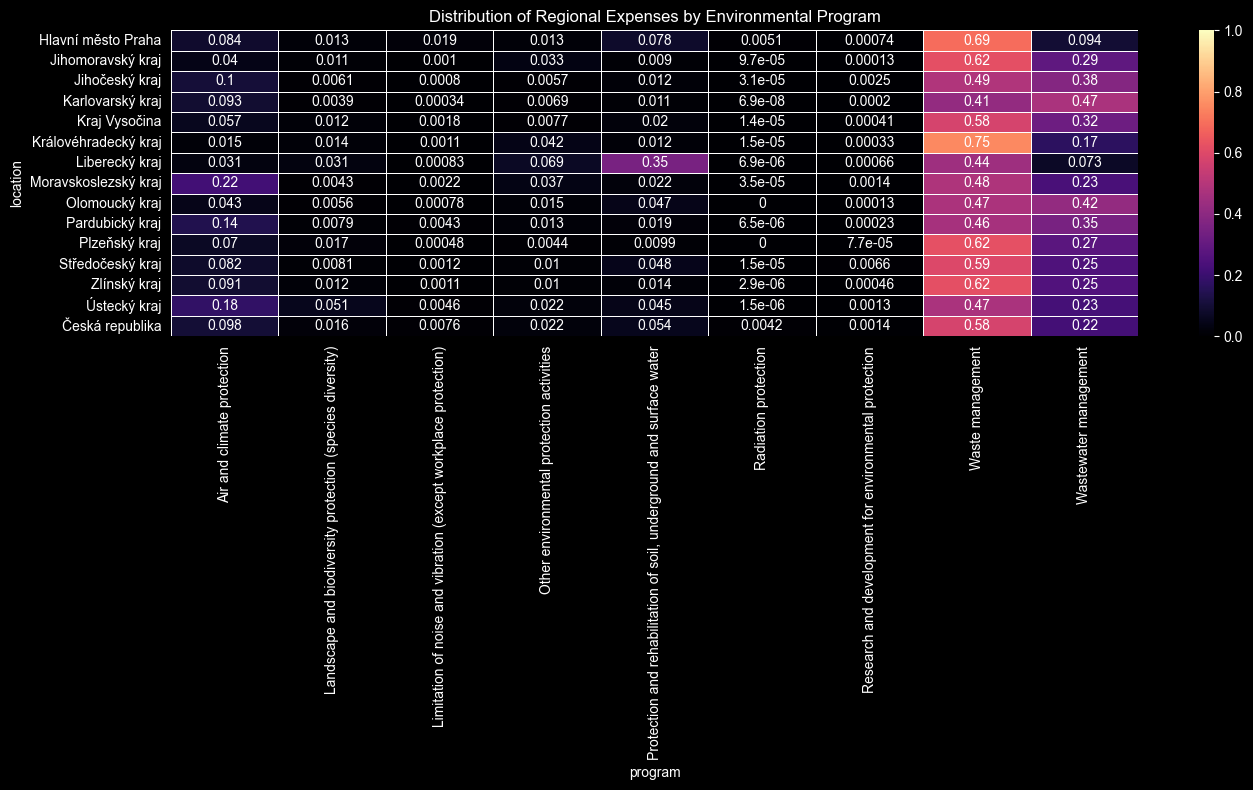

In [28]:
# getting percentage distribution of expenses within a single region
pivot_table_percent = pivot_table_corr.div(pivot_table_corr.sum(axis=1), axis=0)

plt.figure(figsize=(14, 8), facecolor='black')

sns.heatmap(pivot_table_percent, cmap='magma', linewidths=0.5, linecolor='white', annot=True, vmin=0, vmax=1)

plt.title('Distribution of Regional Expenses by Environmental Program')
plt.tight_layout()
plt.show()

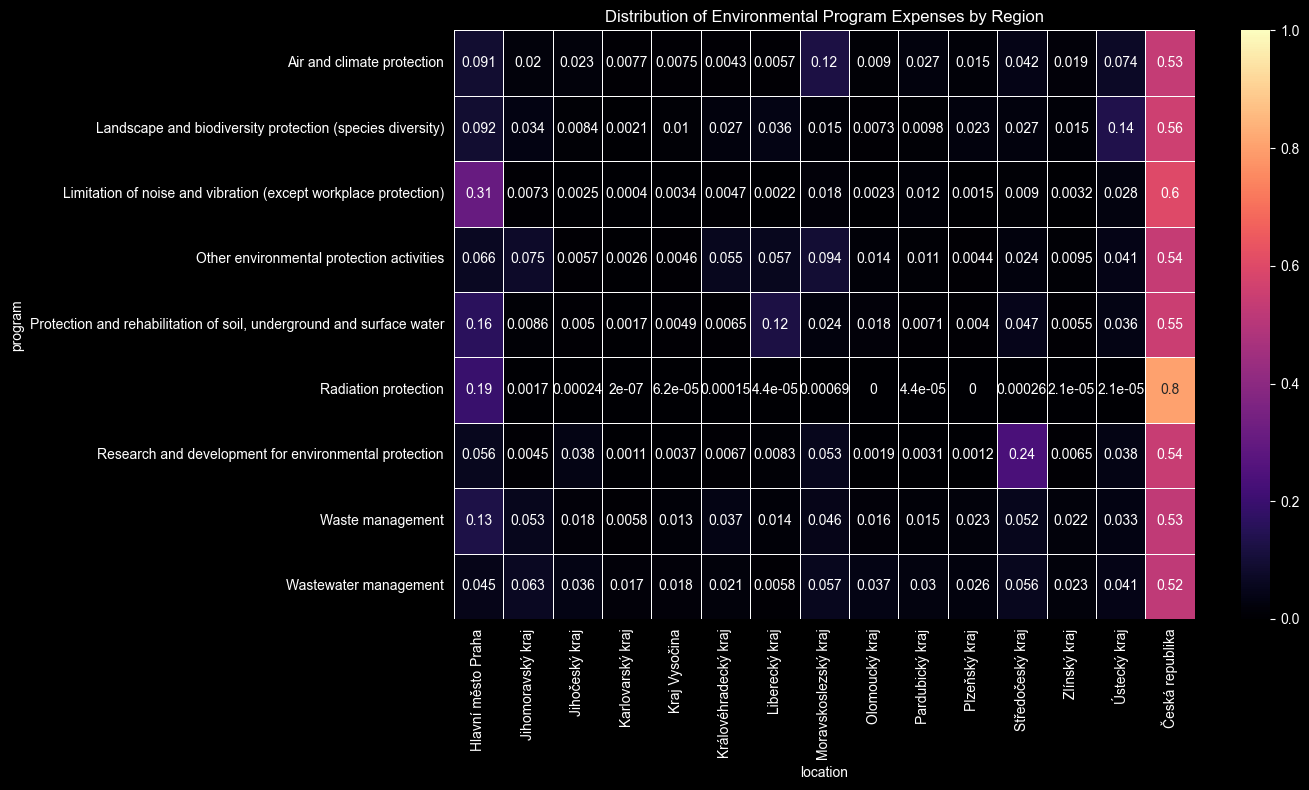

In [29]:
# getting percentage distribution of expenses within a single program
pivot_table_percent = pivot_table_corr.div(pivot_table_corr.sum(axis=0), axis=1).T

plt.figure(figsize=(14, 8), facecolor='black')

sns.heatmap(pivot_table_percent, cmap='magma', linewidths=0.5, linecolor='white', annot=True, vmin=0, vmax=1)

plt.title('Distribution of Environmental Program Expenses by Region')
plt.tight_layout()
plt.show()

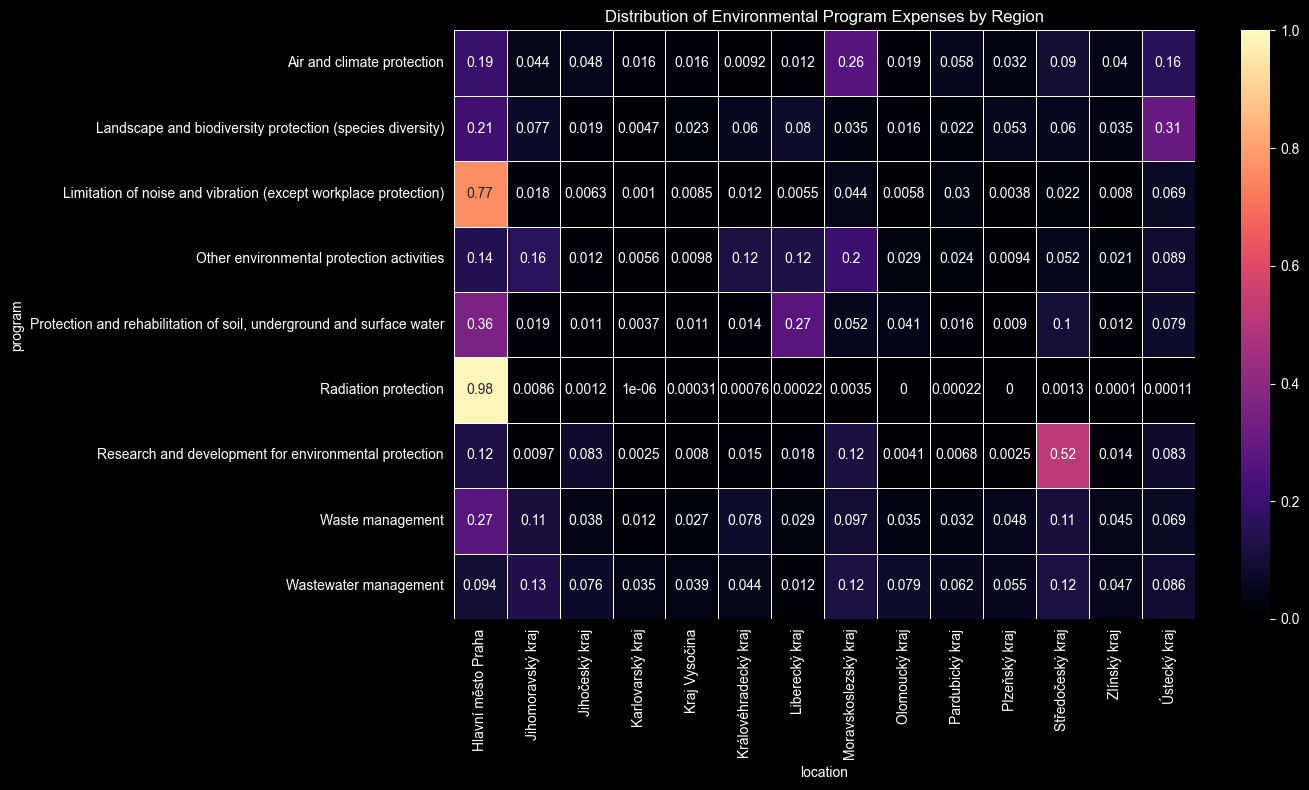

In [30]:
# digging into the Distribution of Environmental Program Expenses by Region removing expenses without precise location
pivot_table_filtered = pivot_table_corr[pivot_table_corr.index != 'Česká republika']
pivot_table_percent = pivot_table_filtered.div(pivot_table_filtered.sum(axis=0), axis=1).T

plt.figure(figsize=(14, 8), facecolor='black')

sns.heatmap(pivot_table_percent, cmap='magma', linewidths=0.5, linecolor='white', annot=True, vmin=0, vmax=1)

plt.title('Distribution of Environmental Program Expenses by Region')
plt.tight_layout()
plt.show()


In [31]:
# creating heatmap to investigate the percentage of confidential transactions between location and type of expense
pivot_total_count = count_by_region = df.groupby(['location', 'type_of_expense']).size().reset_index(name='total')
pivot_conf_count = df[df['confidentiality'] == 'duverny'].groupby(['location', 'type_of_expense']).size().reset_index(name='confidential')

pivot_conf_corr = pd.merge(pivot_conf_count, pivot_total_count, on=['location', 'type_of_expense'], how='inner')
pivot_conf_corr['share_of_conf'] = pivot_conf_corr['confidential']/pivot_conf_corr['total']

pivot_table_conf_corr = pivot_conf_corr.pivot(index='location', columns='type_of_expense', values='share_of_conf').fillna(0)
print(pivot_table_conf_corr)

type_of_expense       Capitalized output (methodology valid until 2015)  \
location                                                                  
Hlavní město Praha                                             0.171429   
Jihomoravský kraj                                              0.171429   
Jihočeský kraj                                                 0.207143   
Karlovarský kraj                                               0.164286   
Kraj Vysočina                                                  0.250000   
Královéhradecký kraj                                           0.278571   
Liberecký kraj                                                 0.228571   
Moravskoslezský kraj                                           0.142857   
Olomoucký kraj                                                 0.221429   
Pardubický kraj                                                0.207143   
Plzeňský kraj                                                  0.185714   
Středočeský kraj         

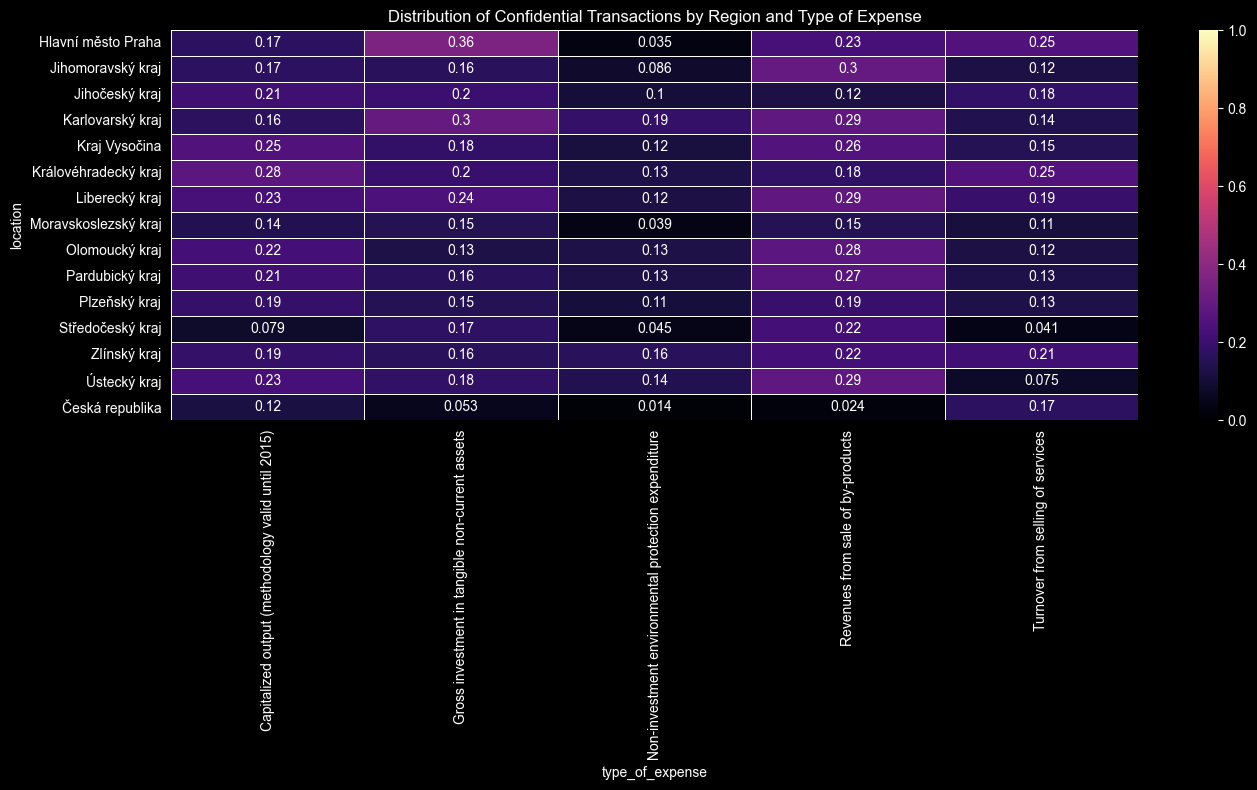

In [32]:
# overview of count of confidential transactions over regions and type of expense
plt.figure(figsize=(14, 8), facecolor='black')

sns.heatmap(pivot_table_conf_corr, cmap='magma', linewidths=0.5, linecolor='white', annot=True, vmin=0, vmax=1)

plt.title('Distribution of Confidential Transactions by Region and Type of Expense')
plt.tight_layout()
plt.show()

In [33]:
# creating heatmap to investigate the correlation between location and type of expense
pivot_corr = df.groupby(['location', 'type_of_expense'])['amount'].sum().reset_index()
pivot_table_corr = pivot_corr.pivot(index='location', columns='type_of_expense', values='amount').fillna(0)

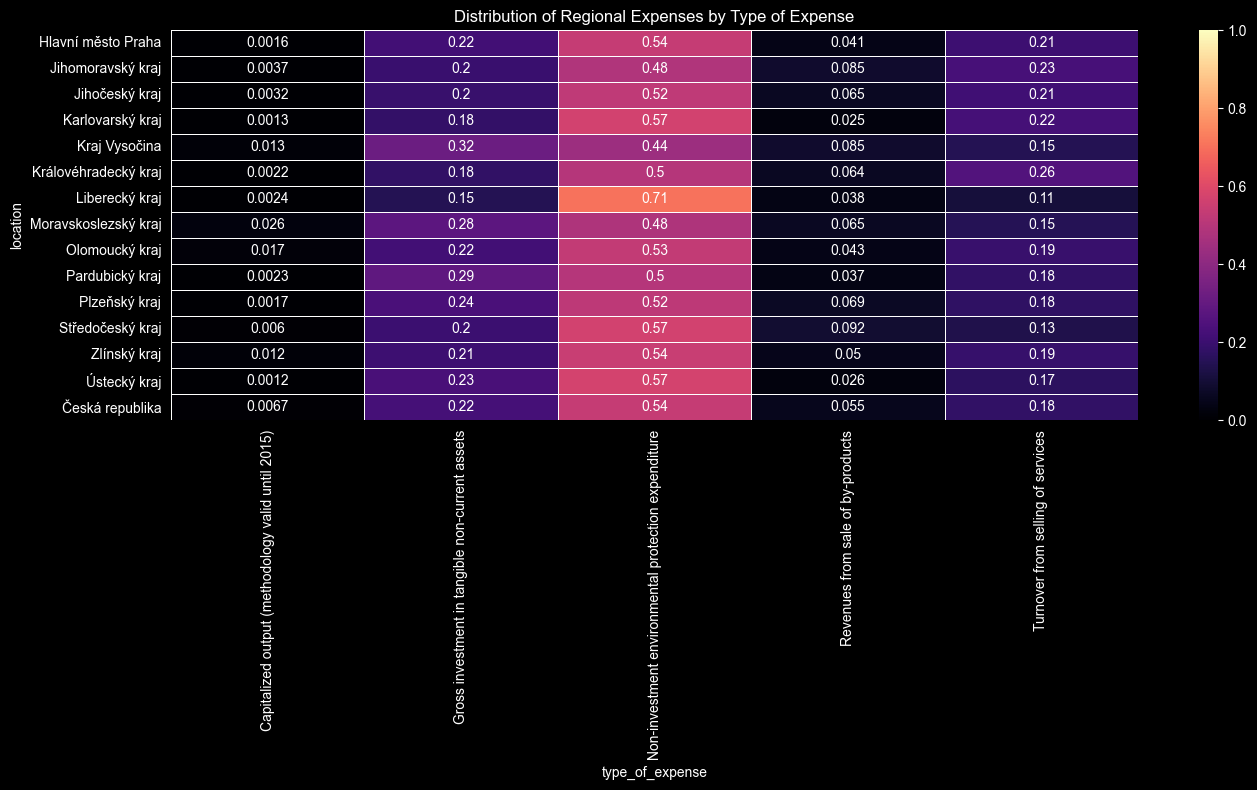

In [34]:
# getting percentage distribution of expenses within a single region
pivot_table_percent = pivot_table_corr.div(pivot_table_corr.sum(axis=1), axis=0)

plt.figure(figsize=(14, 8), facecolor='black')

sns.heatmap(pivot_table_percent, cmap='magma', linewidths=0.5, linecolor='white', annot=True, vmin=0, vmax=1)

plt.title('Distribution of Regional Expenses by Type of Expense')
plt.tight_layout()
plt.show()

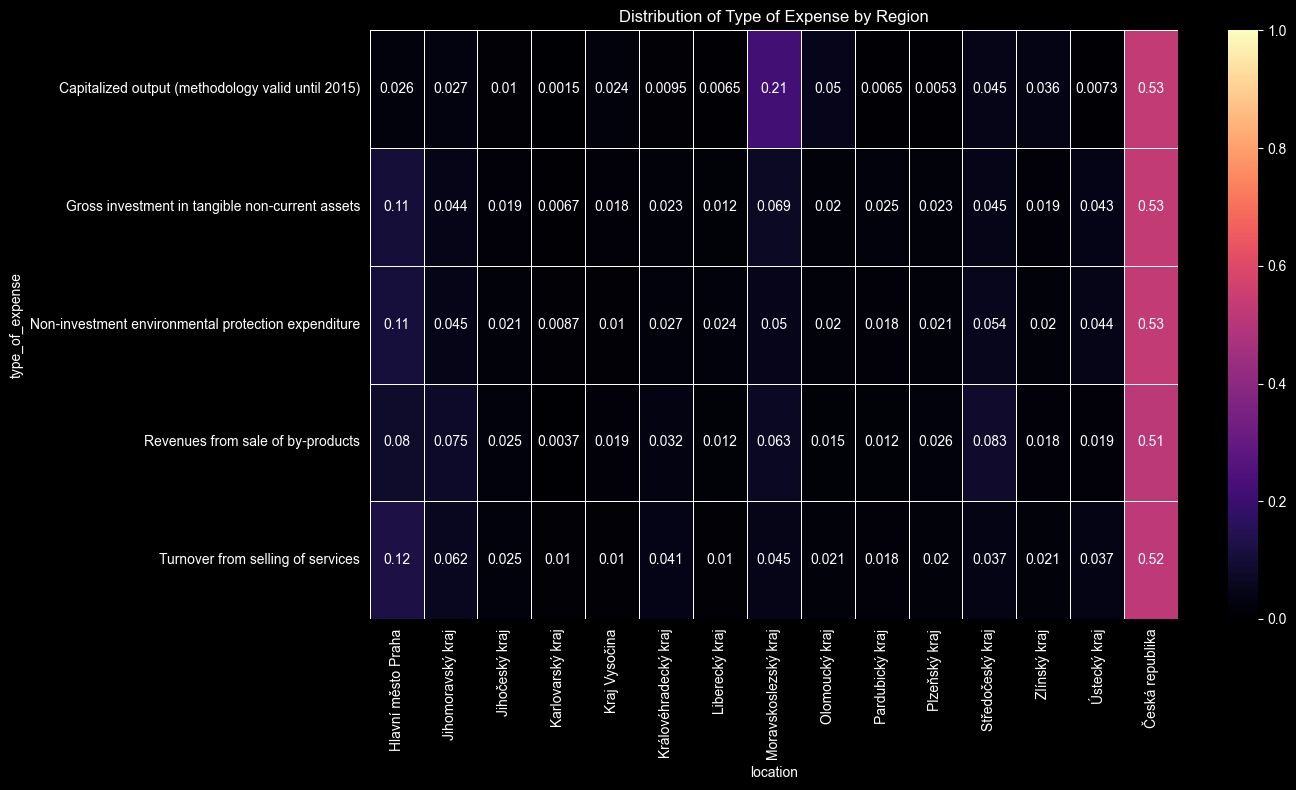

In [35]:
# getting percentage distribution of expenses within a single type of expense
pivot_table_percent = pivot_table_corr.div(pivot_table_corr.sum(axis=0), axis=1).T

plt.figure(figsize=(14, 8), facecolor='black')

sns.heatmap(pivot_table_percent, cmap='magma', linewidths=0.5, linecolor='white', annot=True, vmin=0, vmax=1)

plt.title('Distribution of Type of Expense by Region')
plt.tight_layout()
plt.show()

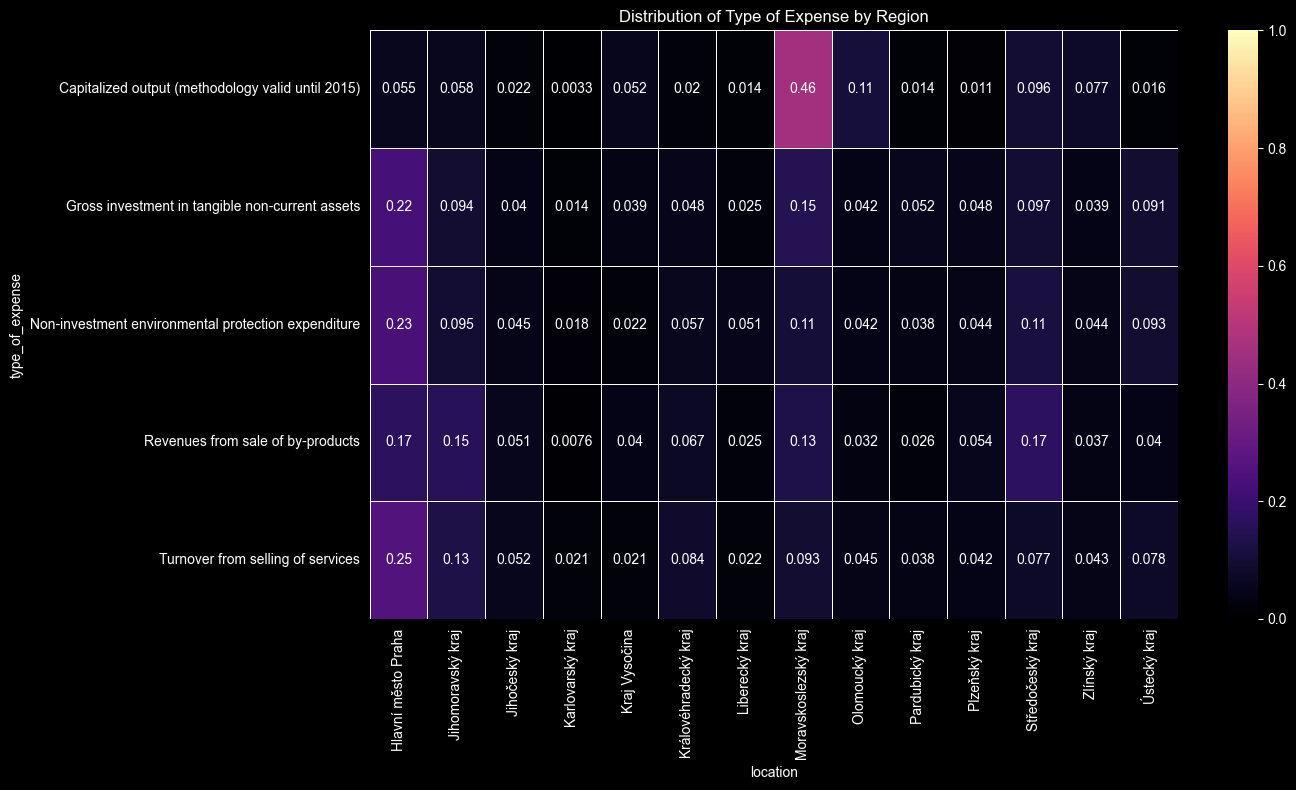

In [45]:
# digging into the Distribution of type of expense by Region removing expenses without precise location
pivot_table_filtered = pivot_table_corr[pivot_table_corr.index != 'Česká republika']
pivot_table_percent = pivot_table_filtered.div(pivot_table_filtered.sum(axis=0), axis=1).T

plt.figure(figsize=(14, 8), facecolor='black')

sns.heatmap(pivot_table_percent, cmap='magma', linewidths=0.5, linecolor='white', annot=True, vmin=0, vmax=1)

plt.title('Distribution of Type of Expense by Region')
plt.tight_layout()
plt.show()